#Supervised Learning

Pada supervised learning kita melatih sekumpulan data yang memiliki label

##Latihan SKLearn Decision Tree

##Tahapan Latihan
Dataset iris terdiri dari 4 atribut yaitu panjang sepal, lebar sepal, panjang petal, dan lebar petal. Terdapat 3 kelas target pada dataset ini. Data ini digunakan untuk masalah klasifikasi, di mana kita memprediksi jenis spesies sebuah bunga berdasarkan atribut-atribut yang diberikan.

Tahapan yang ada pada latihan ini antara lain:

1. Ubah dataset ke dalam dataframe.
2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label.
3. Bagi dataset menjadi data latih dan data uji.
4. Buat dan latih model Decision Tree.
5. Lakukan pengujian model dengan menggunakan data uji.
6. Lakukan prediksi dengan model yang telah dilatih.
7. Visualisasi model Decision Tree yang telah dilatih.

In [ ]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

Untuk melihat informasi mengenai data, gunakan fungsi info(). Selain itu, Anda juga bisa melihat lima data teratas pada dataset menggunakan fungsi head().

In [ ]:
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dari output di atas, kita dapat mengidentifikasi kolom yang tidak penting pada dataset yaitu kolom "Id". Untuk menghilangkan kolom tersebut, gunakan fungsi drop().

In [ ]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

Sebelum melatih model kita perlu memisahkan atribut dengan label. Selain itu, kita juga perlu membagi dataset menjadi data latih dan data uji. Jalankan kode berikut untuk menerapkan tahapan di atas.

In [ ]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

Selanjutnya, definisikan model decision tree yang akan kita gunakan. Kemudian,  latih model menggunakan data latih menggunakan fungsi fit().

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

Setelah model dilatih, uji model menggunakan data uji untuk melihat seberapa baik model yang telah kita buat. Pengujian model ini bisa dilakukan dengan menggunakan fungsi predict().

Berikutnya, gunakan metrik akurasi untuk melihat seberapa baik model yang telah kita latih. Penjelasan terkait metrik akurasi ini akan dibahas pada modul selanjutnya.

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


Pada contoh berikut, kita ingin memprediksi spesies dari sebuah bunga iris  yang memiliki panjang sepal 6,2 centimeter, lebar sepal 3,4 centimeter, panjang petal 5,4 centimeter, dan lebar petal 2,3 centimeter.

In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab (jika Anda menggunakan Google Colab).

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Berikut merupakan hasil visualisasi dari model decision tree yang telah kita gunakan:

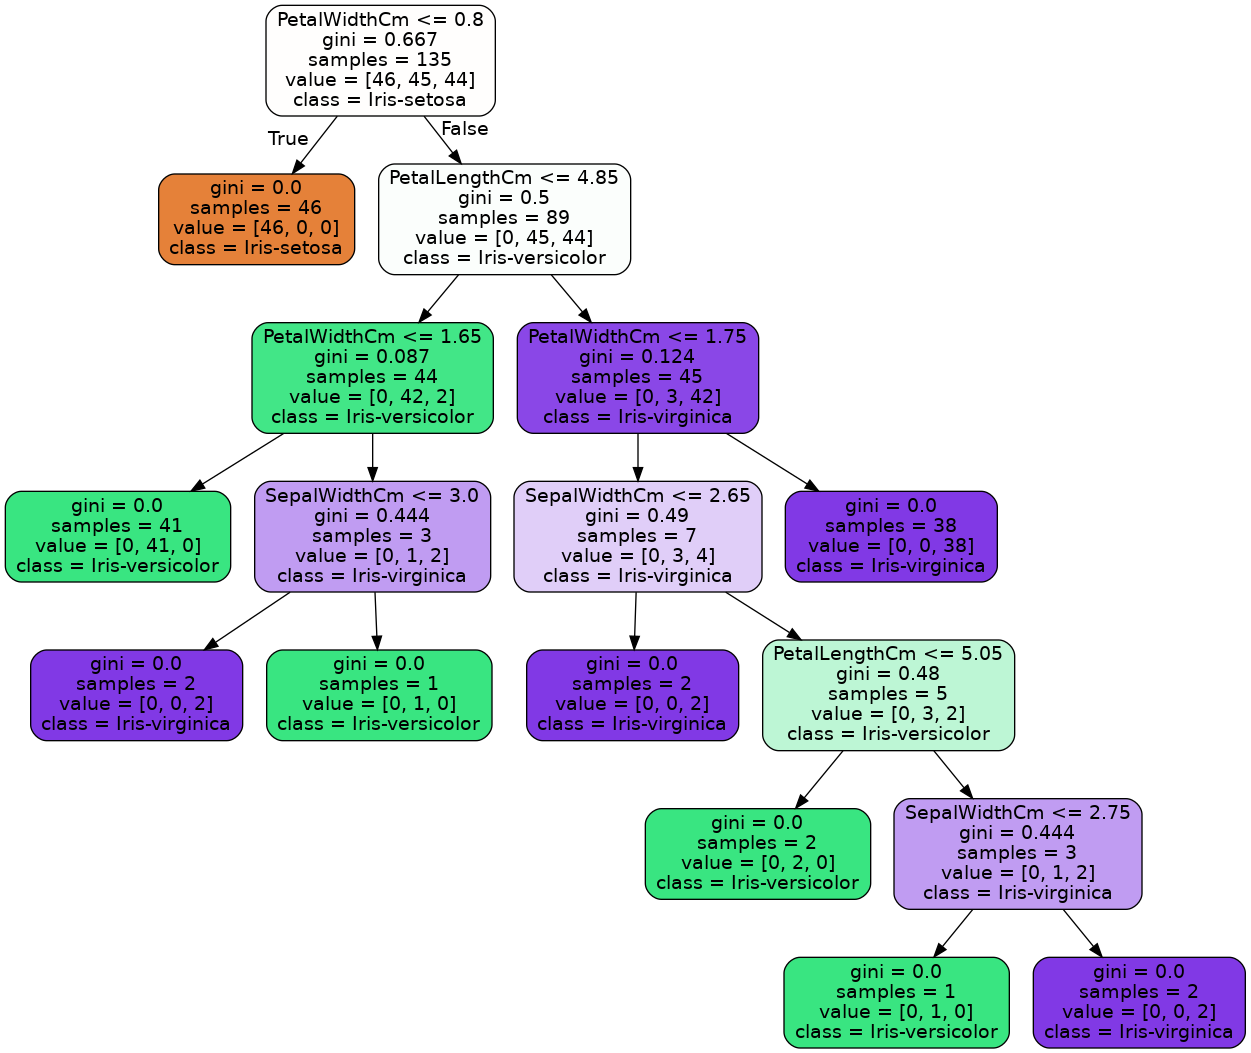

##Supervised : Regression

Regresi adalah salah satu teknik ML yang mirip dengan klasifikasi. Bedanya pada klasifikasi, sebuah model ML memprediksi sebuah kelas, sedangkan model regresi memprediksi bilangan kontinu. Bilangan kontinu adalah bilangan numerik.

Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. Namun untuk implementasi pada kebanyakan kasus, ia kurang direkomendasikan.

1. Secara sederhana regresi linear adalah teknik untuk memprediksi sebuah nilai dari variable Y (variabel dependen) berdasarkan beberapa variabel tertentu X (variabel independen) jika terdapat hubungan linier antara X dan Y.

2. Hubungan antara hubungan linier dapat direpresentasikan dengan sebuah garis lurus (disebut garis regresi). Ilustrasi hubungan linier dapat dilihat pada gambar di mana data-data cenderung memiliki pola garis lurus.
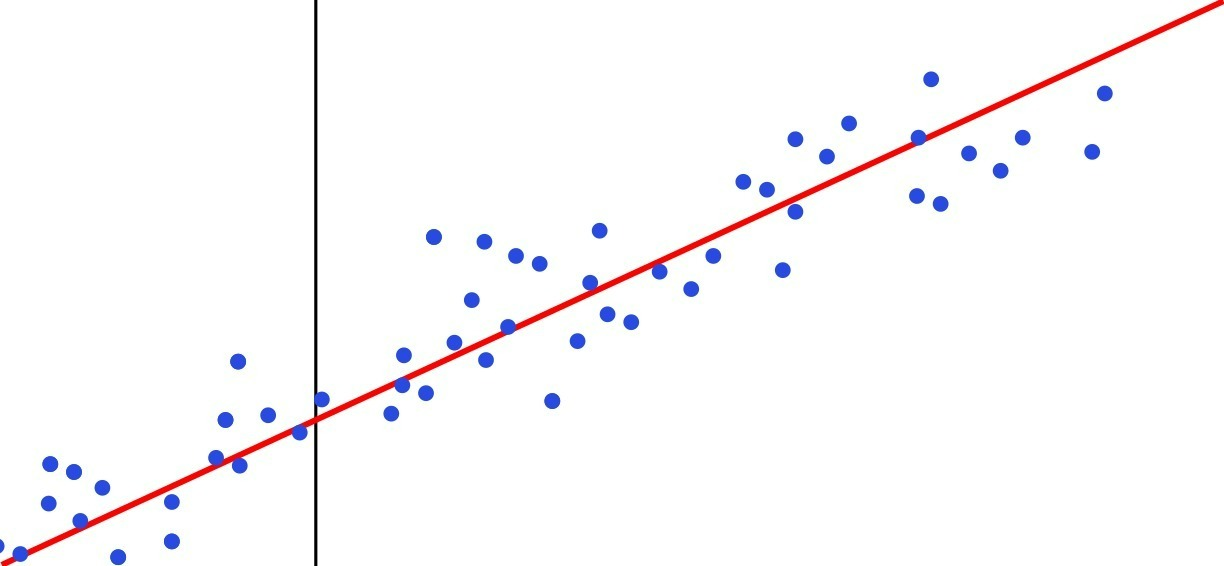
3. Ketika sebuah garis regresi digambar, beberapa data akan berada pada garis regresi dan beberapa yang lainnya akan berada di dekat garis tersebut. Sebabnya, garis regresi adalah sebuah model probabilistik dan prediksi kita adalah perkiraan. Jadi tentu akan ada eror/penyimpangan terhadap nilai asli dari variabel Y. Pada gambar di bawah, garis abu-abu (garis dari titik merah) yang menghubungkan data-data ke garis regresi (garis biru) merupakan error. Semakin banyak eror artinya model regresi itu belum optimal.
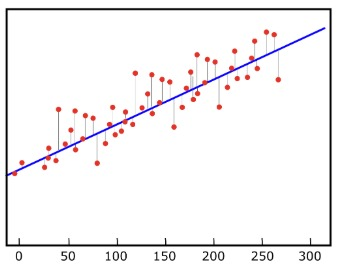

**Logistic Regression**

Logistic regression dikenal juga sebagai logit regression, maximum-entropy classification, dan log-linear classification merupakan salah satu metode yang umum digunakan untuk klasifikasi. Pada kasus klasifikasi, logistic regression bekerja dengan menghitung probabilitas kelas dari sebuah sampel.

##Latihan SKLearn Linear Regression

Tujuan

Pada latihan kali ini kita akan memprediksi harga rumah berdasarkan jumlah kamar.


Tahapan Latihan

Berikut adalah tahapan latihan yang akan Anda lakukan:

1. Impor library yang dibutuhkan.
2. Buat dataset dummy dengan Numpy Array.
3. Buat plot dari model.

In [ ]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

Selanjutnya, kita bisa mencoba menampilkan data tersebut dalam bentuk scatter plot. Jumlah kamar pada sumbu X adalah variabel independen dan harga rumah pada sumbu Y  adalah variabel dependen.

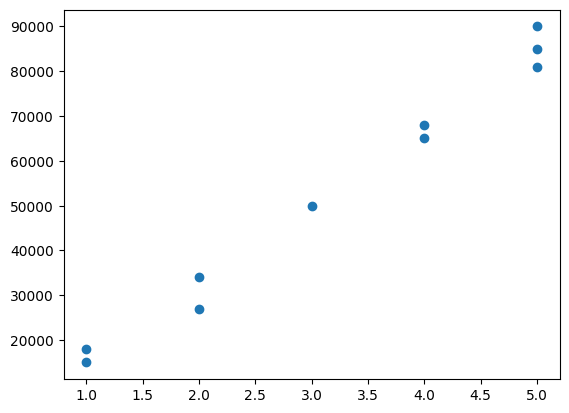

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

Lalu pada cell berikutnya, kita bisa mulai melatih model kita dengan memanggil fungsi LinearRegression.fit() pada data kita. Fungsi ini untuk melatih model regresi linier dari library SKLearn.

In [ ]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

Terakhir kita bisa melihat bagaimana model kita menyesuaikan dengan data yang kita miliki dengan membuat plot dari model kita.

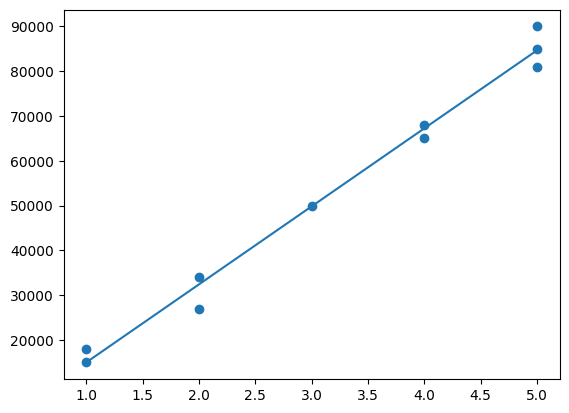

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

##Latihan SKLearn Logistic Regression

*Tujuan*

Pada latihan ini kita akan menggunakan logistic regression untuk memprediksi apakah seseorang akan membeli setelah melihat iklan sebuah produk.


*Tahapan Latihan*

Tahapan yang dilalui dalam latihan kali ini adalah sebagai berikut:

1. Ubah dataset menjadi Dataframe.
2. Hapus kolom 'User ID'.
3. Pisahkan atribut dan label.
4. Latih model Logistic Regression.
5. Evaluasi akurasi model.


In [ ]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df. head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Untuk menghilangkan kolom dari dataframe, gunakan fungsi drop. Jangan lupa panggil fungsi get_dummies() untuk melakukan proses One-Hot Encoding karena label pada dataset kita merupakan data kategorikal

In [ ]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [ ]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [ ]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

Setelah membagi data, kita buat model dengan membuat sebuah objek logistic regression. Setelah model dibuat, kita bisa melatih model kita dengan train set menggunakan fungsi fit().

In [ ]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

menguji akurasi model pada test set dengan memanggil fungsi score() pada objek model.

In [ ]:
# uji akurasi model
model.score(X_test, y_test)

0.825

#Unsupervised Learning

Beberapa algoritma unsupervised learning yang penting untuk Anda ketahui adalah: clustering, dimensionality reduction, anomaly detection, dan density estimation.

Kita akan mulai dengan K-Means Clustering dan Dimensionality Reduction (LDA, PCA, t-SNE)

##Clustering

Klaster (cluster) adalah sebuah grup yang memiliki kemiripan tertentu. Pengklasteran adalah sebuah metode machine learning unsupervised untuk mengelompokkan objek-objek yang memiliki kemiripan, ke dalam sebuah klaster. Karena termasuk kategori unsupervised, maka dataset yang digunakan model clustering tidak memiliki label.

##K-Means Clustering

Pengklasteran K-Means adalah sebuah metode yang dikembangkan oleh Stuart Lloyd dari Bell Labs pada tahun 1957. Lloyd menggunakan metode ini untuk mengubah sinyal analog menjadi sinyal digital. Proses pengubahan sinyal ini juga dikenal sebagai Pulse Code Modulation.

##Latihan SKLearn K-means
*Tujuan*

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.


*Tahapan Latihan*

Tahapan pada latihan kali ini adalah sebagai berikut:

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.


Pada cell pertama, kita ubah file csv kita ke dalam dataframe pandas dan menampilkan 3 baris pertama dari dataframe.

In [ ]:
import pandas as pd

#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Kemudian kita akan melakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.

In [ ]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [ ]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jalankan kode di bawah untuk membuat plot inersia dari setiap nilai K. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5. Jangan lupa mengimpor library yang dibutuhkan untuk membuat plot ya.

Text(0, 0.5, 'Inertia')

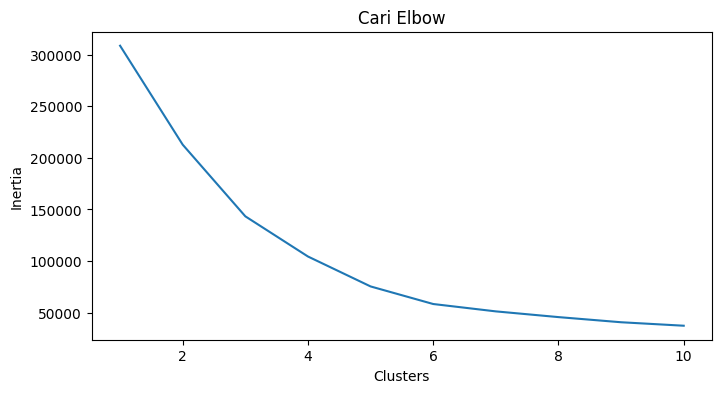

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


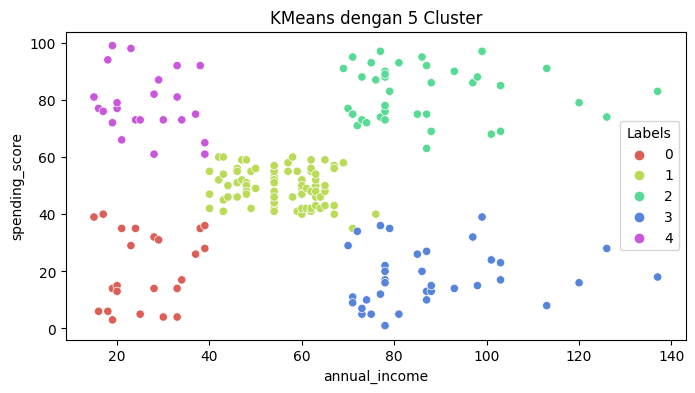

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

#Dimensionality Reduction : LDA, PCA, t-SNE

##Principal Component Analysis (PCA)

PCA adalah mereduksi dimensi atau mengurangi jumlah atribut pada dataset tanpa mengurangi informasi. Contohnya pada sebuah dataset harga rumah. Pada PCA setiap atribut disebut sebagai principal component. Jika terdapat 10 atribut pada dataset, berarti terdapat 10 principal component. PCA bekerja dengan menghitung variance dari tiap atribut. Variance adalah informasi yang dimiliki sebuah atribut.

##LDA

Linear Discriminant Analysis atau analisis diskriminan linier adalah teknik statistika yang dipakai untuk reduksi dimensi. LDA bekerja dengan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas pada dataset dan meminimalkan varian pada masing-masing kelas. Kontras dengan PCA yang bekerja dengan mencari atribut komponen yang memiliki varian tertinggi.

Perbedaan mendasar lain yang membedakan LDA dan PCA adalah PCA merupakan teknik unsupervised karena pada pengurangan dimensi, PCA tidak menghiraukan label yang terdapat pada dataset. Sedangkan LDA merupakan teknik supervised karena LDA memperhatikan bagaimana kelas-kelas pada data dapat dipisahkan dengan baik.

##t-SNE

t-Distributed Stochastic Neighbor Embedding atau sering disebut t-SNE  adalah teknik non linear unsupervised yang digunakan untuk reduksi dimensi, eksplorasi data, dan visualisasi data berdimensi tinggi.

##Latihan SKLearn PCA

*Tujuan*

Pada latihan ini, kita akan berlatih mengimplementasi PCA dengan library SKLearn.

*Tahapan Latihan*

Tahapan pada latihan ini sebagai berikut:

1. Bagi dataset.
2. Latih model tanpa PCA.
3. Latih model dengan PCA.
4. Evaluasi hasil kedua model.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)

Kita akan menggunakan model Decision Tree dan menghitung berapa akurasinya tanpa menggunakan PCA. Akurasi tanpa PCA adalah 0.9666. Akurasi dari model Anda mungkin berbeda dengan keluaran di bawah.

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9666666666666667

Kemudian kita akan menggunakan PCA dan menghitung variance dari setiap atribut. Hasilnya adalah 1 atribut memiliki variance sebesar 0.922, yang berarti atribut tersebut menyimpan informasi yang tinggi dan jauh lebih signifikan dari atribut lain.

In [ ]:
from sklearn.decomposition import PCA

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.976 yang sudah cukup tinggi.

In [ ]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
# Kita akan menguji akurasi dari classifier setelah menggunakan PCA.
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333